# Lab 2
## Exercise 1

In [1]:
print("Hello world")

Hello world


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import string
import math
from fractions import Fraction

### Question 1

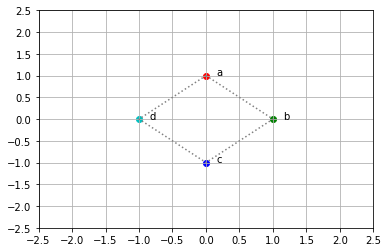

In [2]:
# points a, b and, c
a, b, c, d = (0, 1, 0), (1, 0, 1), (0, -1, 2), (-1, 0, 3)

# matrix with row vectors of points
A = np.array([a, b, c, d])

# 3x3 Identity transformation matrix
I = np.eye(3) #float



def plot_4pt(A, T):
    color_lut = 'rgbc' #4 colors to represent 4 points

    fig = plt.figure()
    ax = plt.gca()
    xs = []
    ys = []
    for row in A:
        output_row = T @ row
        x, y, i = output_row
        xs.append(x)
        ys.append(y)
        i = int(i) # convert float to int for indexing
        c = color_lut[i]
        plt.scatter(x, y, color=c)
        plt.text(x + 0.15, y, f"{string.ascii_letters[i]}")
    xs.append(xs[0])
    ys.append(ys[0])
    plt.plot(xs, ys, color="gray", linestyle='dotted')
    ax.set_xticks(np.arange(-2.5, 3, 0.5))
    ax.set_yticks(np.arange(-2.5, 3, 0.5))
    plt.grid()
    plt.show()

plot_4pt(A, I)

### Question 2
### i) Scaling transformation with scale of 2

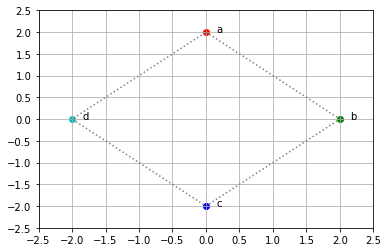

In [3]:
def scale(sx, sy):
    scale_mat = np.eye(3)
    scale_mat[0][0], scale_mat[1][1] = sx, sy
    return scale_mat

plot_4pt(A, scale(2,2))

### ii) Rotation transformation with 90°

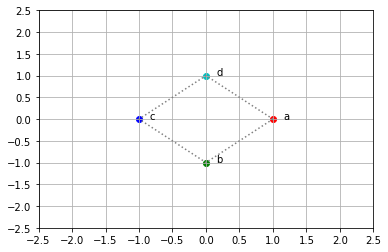

In [4]:
def rotation(t):
    t = (t/180) * math.pi
    rotation_mat = np.eye(3)
    rotation_mat[0][0], rotation_mat[0][1] = math.cos(t), math.sin(t)
    rotation_mat[1][0], rotation_mat[1][1] = -math.sin(t), math.cos(t)
    return rotation_mat

plot_4pt(A, rotation(90))

### iii) Translation, horizontal shear & vertical shear

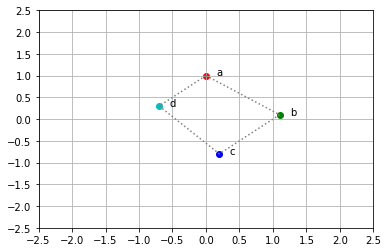

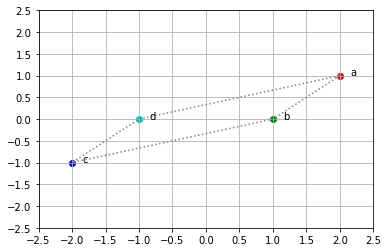

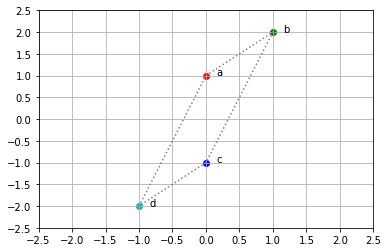

In [5]:
def translation(tx, ty):
    translation_mat = np.eye(3)
    translation_mat[0][2] = tx
    translation_mat[1][2] = ty
    return translation_mat

def hori_shear(h):
    hori_mat = np.eye(3)
    hori_mat[0][1] = h
    return hori_mat

def vert_shear(v):
    vert_mat = np.eye(3)
    vert_mat[1][0] = v
    return vert_mat

plot_4pt(A, translation(0.1,0.1))
plot_4pt(A, hori_shear(2))
plot_4pt(A, vert_shear(2))

### Question 3

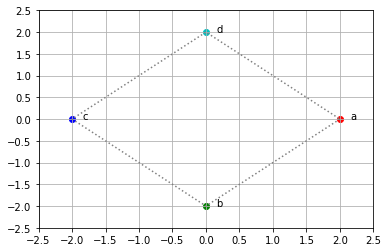

In [6]:
def rotate_scale(t,sx, sy):
    transform_mat = rotation(t)@scale(sx, sy)
    return transform_mat

plot_4pt(A, rotate_scale(90, 2, 2))

## Exercise 2
### Question 4
#### Function to transform a matrix into Reduced Row Echelon Form

In [7]:
def rref(A):
    tol = 1e-14
    #A = B.copy()
    rows, cols = A.shape
    r = 0
    pivots_pos = []
    row_exchanges = np.arange(rows)
    for c in range(cols):
        ## Find the pivot row:
        pivot = np.argmax (np.abs (A[r:rows,c])) + r
        m = np.abs(A[pivot, c])
        
        if m <= tol:
        ## Skip column c, making sure the approximately zero terms are
        ## actually zero.
            A[r:rows, c] = np.zeros(rows-r)
        else:
            ## keep track of bound variables
            pivots_pos.append((r,c))

            if pivot != r:
                ## Swap current row and pivot row
                A[[pivot, r], c:cols] = A[[r, pivot], c:cols]
                row_exchanges[[pivot,r]] = row_exchanges[[r,pivot]]

            ## Normalize pivot row
            A[r, c:cols] = A[r, c:cols] / A[r, c];

            ## Eliminate the current column
            v = A[r, c:cols]
            ## Above (before row r):
            if r > 0:
                ridx_above = np.arange(r)
                A[ridx_above, c:cols] = A[ridx_above, c:cols] - np.outer(v, A[ridx_above, c]).T
                ## Below (after row r):
            if r < rows-1:
                ridx_below = np.arange(r+1,rows)
                A[ridx_below, c:cols] = A[ridx_below, c:cols] - np.outer(v, A[ridx_below, c]).T
                r += 1
        ## Check if done
        if r == rows:
            break;
    return A


In [8]:
# Linking Matrix
L = [[0, 1/3, 1/3, 1/2],
     [1/2, 0, 1/3, 0],
     [1/2, 1/3, 0, 1/2],
     [0, 1/3, 1/3, 0]]

I_4 = np.eye(4)
zero_vector = np.zeros((4,1))

# Let (L-I) = W
W = np.subtract(L, I_4)

# Form Augmented matrix Q with W and 0 vector
Q = np.hstack((W, zero_vector))

rref_Q = rref(Q)
# Let r_D = 1
r_A = -Fraction(rref_Q[0][-2]).limit_denominator()
r_B = -Fraction(rref_Q[1][-2]).limit_denominator() 
r_C = -Fraction(rref_Q[2][-2]).limit_denominator()
print("r_D is a free variable.")
print("By setting r_D = 1:")
print(f"r_A = {r_A}")
print(f"r_B = {r_B}")
print(f"r_C = {r_C}")

r_D is a free variable.
By setting r_D = 1:
r_A = 3/2
r_B = 21/16
r_C = 27/16


### a) Does the equation Lr = r always have a solution?
#### Yes, given Lr = r is the same as (L-I)r = 0, since (L-I)r = 0 is a homogeneous linear system, it either has only a trivial solution or infinitely many solutions. Therefore, Lr = r always have a solution.

### b) Will a solution have entries that are non-negative?
#### Yes.

### c) Is the solution unique?
#### Since, it is a homogeneous linear system, there can be either be an unique solution or infinitely many solutions.

### Question 5

In [9]:
# Linking Matrix
L2 = [[0, 1/2, 1/4, 1, 1/3],
      [1/3, 0, 1/4, 0, 0],
      [1/3, 1/2, 0, 0, 1/3],
      [1/3, 0, 1/4, 0, 1/3],
      [0, 0, 1/4, 0, 0]]

I_5 = np.eye(5)
zero_vector = np.zeros((5,1))

# Let (L2-I) = Y
Y = np.subtract(L2, I_5)

# Form Augmented matrix Q with Y and 0 vector
R = np.hstack((Y, zero_vector))
rref_R = rref(R)
# x_E is a free variable
x_A = -Fraction(rref_R[0][-2]).limit_denominator()
x_B = -Fraction(rref_R[1][-2]).limit_denominator()
x_C = -Fraction(rref_R[2][-2]).limit_denominator()
x_D = -Fraction(rref_R[3][-2]).limit_denominator()



# Solutions of x in terms of x_E
print('''The solutions of x are multiples of x = [x_A
                                         x_B
                                         x_C
                                         x_D
                                         X_E]''')
print("where x_E is a free variable and")
print(f"x_A = ({x_A})x_E")
print(f"x_B = ({x_B})x_E")
print(f"x_C = {x_C}x_E")
print(f"x_D = ({x_D})x_E")

The solutions of x are multiples of x = [x_A
                                         x_B
                                         x_C
                                         x_D
                                         X_E]
where x_E is a free variable and
x_A = (19/3)x_E
x_B = (28/9)x_E
x_C = 4x_E
x_D = (31/9)x_E


## Exercise 3
### Question 6

In [10]:
x_t = [0.75, 0.1, 0.1, 0.05]

# With the information given, we can form a linking matrix
# Using S(t), I(t), R(t), D(t)
P = [[0.95, 0.04, 0, 0],
     [0.05, 0.85, 0, 0],
     [0, 0.10, 1, 0],
     [0, 0.01, 0, 1]]
P = np.array(P)
# Since, x_t+1 = Px_t
x_t1 = P@np.array(x_t)
print(f"x_t1 = {x_t1}")
print(f'''
The next day after x_t, 
{round(x_t1[0], 4)*100}% of the population is still susceptible to the disease,
{round(x_t1[1], 4)*100}% of the population is infected with the disease,
{round(x_t1[2], 4)*100}% of the population have recovered with immunity to the disease and
{round(x_t1[3], 4)*100}% of the population had died from the disease.''')

x_t1 = [0.7165 0.1225 0.11   0.051 ]

The next day after x_t, 
71.65% of the population is still susceptible to the disease,
12.25% of the population is infected with the disease,
11.0% of the population have recovered with immunity to the disease and
5.1% of the population had died from the disease.


### Question 7

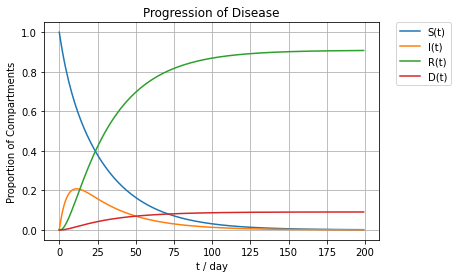

In [11]:
x1 = [1, 0, 0, 0]
Slist, Ilist, Rlist, Dlist = [1], [0], [0], [0]
x2 = [P@np.hstack(x1)]

x3 = [P@np.hstack(x2)]
x_i = x1
for i in range(2, 201):
    x_i = P@np.hstack(x_i)
    Slist.append(x_i[0])
    Ilist.append(x_i[1])
    Rlist.append(x_i[2])
    Dlist.append(x_i[3])
plt.plot(Slist, label = "S(t)")
plt.plot(Ilist, label = "I(t)")
plt.plot(Rlist, label = "R(t)")
plt.plot(Dlist, label = "D(t)")
plt.title("Progression of Disease")
plt.xlabel("t / day")
plt.ylabel("Proportion of Compartments")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid()
plt.show()